# Приклад читання PDF документа

In [12]:
# install.packages("magick")

In [14]:
# install.packages("tesseract")


  There is a binary version available but the source version is later:
          binary source needs_compilation
tesseract  5.1.0  5.2.1              TRUE

  Binaries will be installed
package 'tesseract' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\RtmpwDVdyF\downloaded_packages


In [16]:
library(tidyverse)
library(magick)
library(tesseract)

In [20]:
sack_url <- "data/balance.png"
raw_img <- image_read(sack_url)

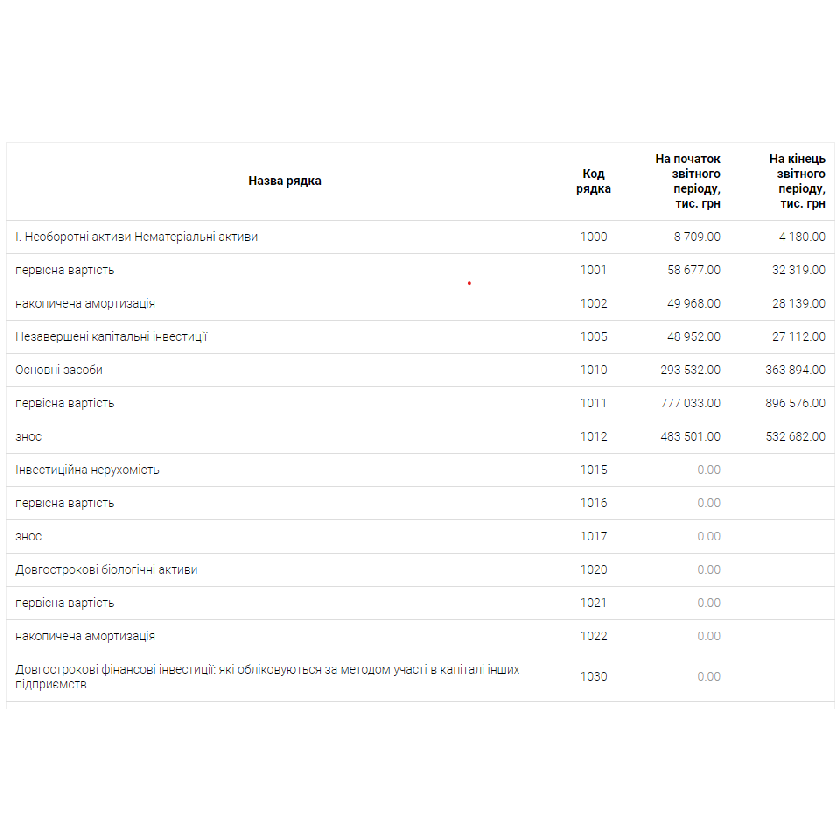

In [23]:
image_ggplot(raw_img)

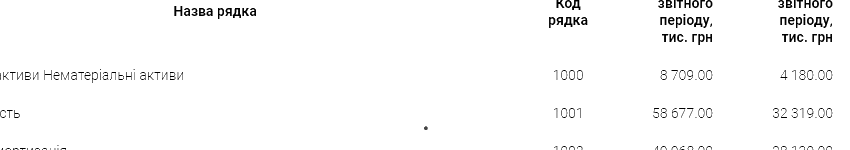

# A tibble: 1 x 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      850    150 Gray       TRUE         0 38x38  

In [29]:
fuzz_fun <- function(fuzz){
  raw_img %>% 
    image_quantize(colorspace = "gray") %>% 
    image_transparent(color = "white", fuzz=fuzz) %>% 
    image_background("white") %>% 
    image_crop(geometry_area(0, 150,110, 45))
}

fuzz_fun(20)

In [ ]:
combo <- tesseract::tesseract(
    options = list(
      tessedit_char_whitelist = paste0(
        c(letters, LETTERS, " ", ".0123456789 (-)"), collapse = "")
      )
  )

raw_text <- no_grid %>%
  image_quantize(colorspace = "gray") %>%
  image_transparent("white", fuzz = 22) %>%
  image_background("white") %>%
  image_threshold() %>%
  image_crop(geometry_area(0, 0, 110, 45)) %>%  
  ocr(engine = combo)